In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
r=int(input('r:'))
d=int(input('d:'))
df=pd.DataFrame({i:100*np.random.random(1000) for i in range(d)})

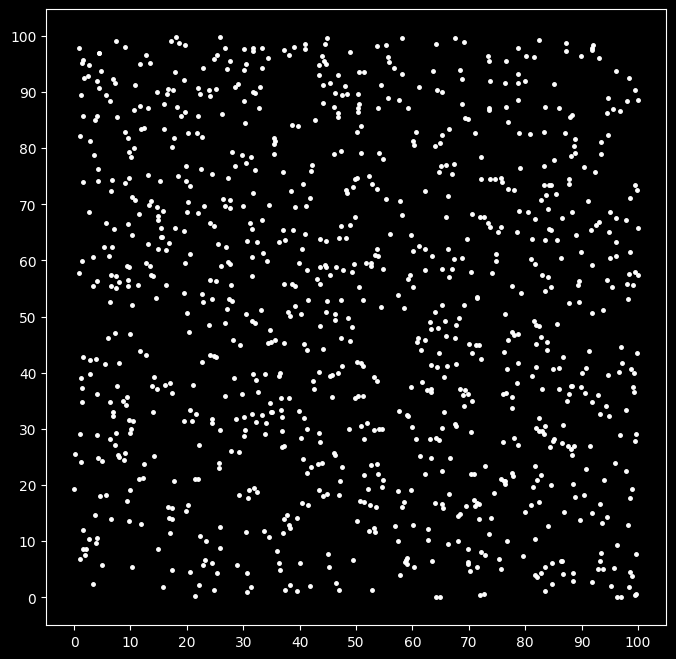

In [104]:
#graph,works only for d=2
plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.plot(df[0],df[1],'w.',markersize=5)
plt.show()

In [105]:
def dist(df_,d,a,b):
    s=0
    for i in range(d):
        s=s+(df_.loc[a,i]-df_.loc[b,i])**2
    return s**(0.5)

In [106]:
pairs=set([])
for i in range(1000):
    grid=np.array([df.loc[i][j]//r for j in range(d)])
    # df_=df.loc[all((df[k]>=grid[k]-1) & (df[k]<=grid[k]+2) for k in range(d))]
    df_ = df.loc[(df.apply(lambda x: (x.between(grid[x.name] - 1, grid[x.name] + 2)), axis=0)).all(axis=1)]
    for k in df_.index:
        if(i!=k):
            l=dist(df,d,i,k)
            if (k,i) in pairs:
                continue
            else:
                pairs.add((i,k))

In [107]:
pt_pairs=set([])
for (i,j) in pairs:
    a=tuple(df.iloc[i,:])
    b=tuple(df.iloc[j,:])
    pt_pairs.add((a,b))

In [108]:
for key in pt_pairs:
    print(key)

((70.89957415076759, 17.41372938974557), (71.89819169565588, 16.614932208241406))
((4.999770331091014, 24.332800863233217), (4.15832921923397, 24.874928242103344))
((11.84485401502602, 83.40284596436733), (12.395756347188847, 83.62311097047026))
((76.43035624556343, 20.133062577784244), (76.24453601155676, 20.69435117962518))
((17.37493548546013, 13.994881756313237), (16.86633679379087, 14.058136489427199))
((76.43035624556343, 20.133062577784244), (75.65766404908793, 21.083587882212296))
((41.472293176677276, 16.461654384301973), (40.47252663303604, 16.860439567451348))
((72.88529061632603, 7.526354614126407), (72.09445388834807, 8.050522210362942))
((27.72143657063708, 70.72692253513473), (26.815066622991257, 69.61563542965042))
((87.97675973010732, 85.53140790939202), (88.28922254607701, 85.91893994921492))
((96.02338391022161, 67.52177993850277), (97.93935866366199, 67.23944573967849))
((18.501787474285393, 75.00497303907258), (19.874669080758302, 74.12604922561839))
((82.720438224